# **Dataset**

In [52]:
import pandas as pd
from sklearn.datasets import load_iris

# Upload the iris dataset from scikit-learn
iris = load_iris()

# Input for machine learning
X = iris.data
# Target output from machine learning
y = iris.target

# Converts feature and target data into a DataFrame
df_X = pd.DataFrame(X, columns=iris.feature_names)
df_y = pd.Series(y, name='target')

In [53]:
# Displaying features from the dataset
df_X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [54]:
# Displaying target from the dataset
df_y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [55]:
# Merging features and target into a single DataFrame
df = pd.concat([df_X, df_y], axis=1)

#Viewing the top 10 rows of the dataset
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [56]:
#Displaying a summary of information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [57]:
#Viewing unique values in the 'target' column from the DataFrame
df['target'].unique()

array([0, 1, 2])

In [58]:
# Displaying a summary of descriptive statistics for numerical columns in the DataFrame
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# **Split Data**

In [59]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

# **Train the Model**

In [76]:
from sklearn.naive_bayes import GaussianNB

# Creating and training a Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

# **Predict & Evaluate**

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict and evaluate
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Laporan Klasifikasi:")
print(f"Akurasi: {accuracy * 100:.2f}%")

Laporan Klasifikasi:
Akurasi: 100.00%


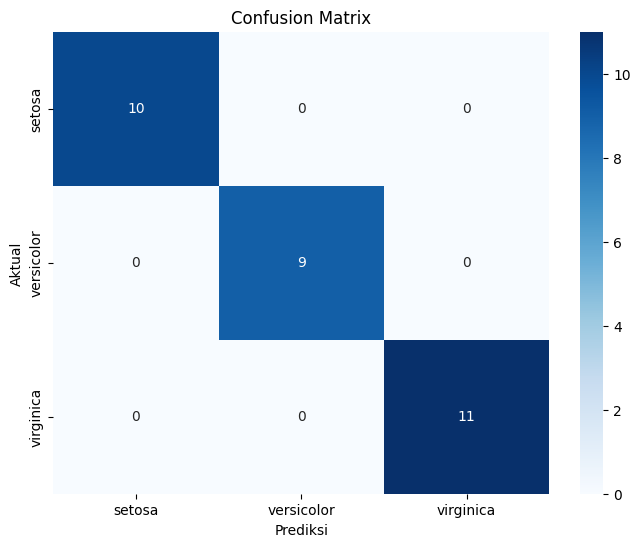

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()

In [79]:
from sklearn.metrics import accuracy_score, classification_report

# Displaying classification report
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

